In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scienceplots
from matplotlib.ticker import PercentFormatter


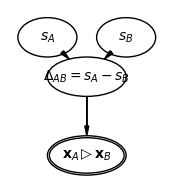

In [10]:
import daft
import matplotlib.pyplot as plt

# Initialize the PGM
pgm = daft.PGM(node_unit=1.,  # Increase node size
               observed_style="inner")  # Style observed nodes

# Nodes for players A and B's skill levels
pgm.add_node("sA", r"$s_A$", 0.5, 1, observed=False, aspect=1.5)
pgm.add_node("sB", r"$s_B$", 1.5, 1, observed=False, aspect=1.5)

# Skill difference node
pgm.add_node("delta", r"$\Delta_{AB} = s_A - s_B$", 1, 0.5, observed=False, aspect=2)

# Win outcome node
pgm.add_node("win_A", r"$\mathbf{x}_A \triangleright \mathbf{x}_B$", 1, -0.5, observed=True, aspect=2)

# Add edges between the nodes
pgm.add_edge("sA", "delta", lw=2)
pgm.add_edge("sB", "delta", lw=2)
pgm.add_edge("delta", "win_A", lw=2)

# Render the PGM
pgm.render()
plt.show()


In [3]:
# Define the function for f(Δ_AB)
def f(delta_ab, beta):
    return norm.cdf(delta_ab / (np.sqrt(2) * beta))

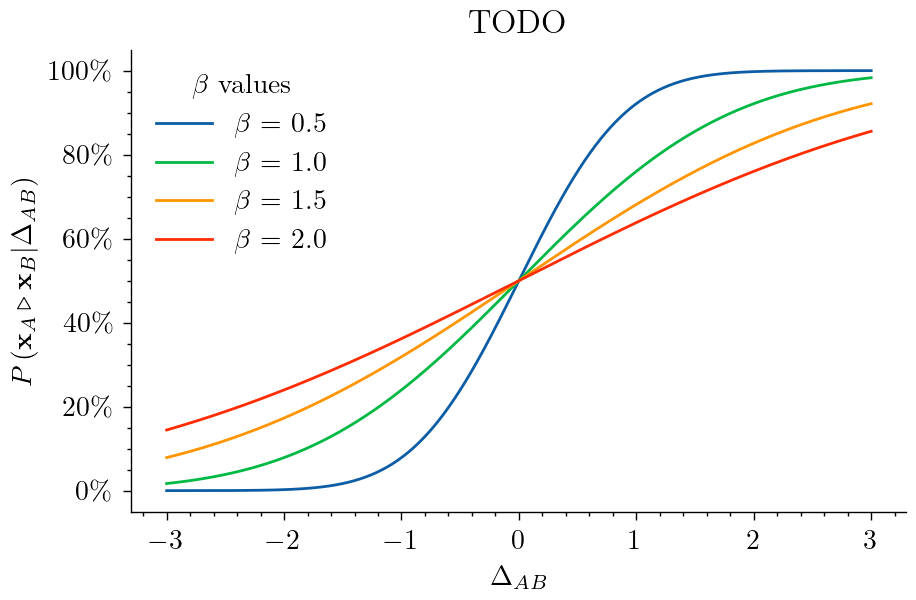

In [4]:
# Define the function for f(Δ_AB)
def f(delta_ab, beta):
    return norm.cdf(delta_ab / (np.sqrt(2) * beta))
# Define range for Δ_AB and different beta values
delta_ab_range = np.linspace(-3, 3, 500)
beta_values = [0.5, 1.0, 1.5, 2.0]

with plt.style.context(['science',]):
    # Plot f(Δ_AB) for different beta values
    plt.figure(figsize=(5, 3), dpi=200)

    for beta in beta_values:
        plt.plot(delta_ab_range, f(delta_ab_range, beta) * 100, label=rf'$\beta$ = {beta}')  # Multiply by 100 for percentage


    plt.grid(True, axis='y', which='major')
    plt.grid(False)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', which='both', direction='out', top=False)    # Removes top ticks
    ax.tick_params(axis='y', which='both', direction='out', right=False)  # Removes right ticks

    # Set y-axis formatter to percentage
    ax.yaxis.set_major_formatter(PercentFormatter())
    
    
    plt.legend(title=r"$\beta$ values")
    plt.xlabel("$\\Delta_{AB}$")
    plt.ylabel(r"$P\left(\mathbf{x}_A \triangleright \mathbf{x}_B | \Delta_{AB} \right) $")
    plt.title("TODO")

    plt.show()


In [14]:
from palettable.colorbrewer.sequential import Purples_6

# Retrieve the color palette from Purples_6
colors = Purples_6.mpl_colors


<Figure size 1200x600 with 0 Axes>

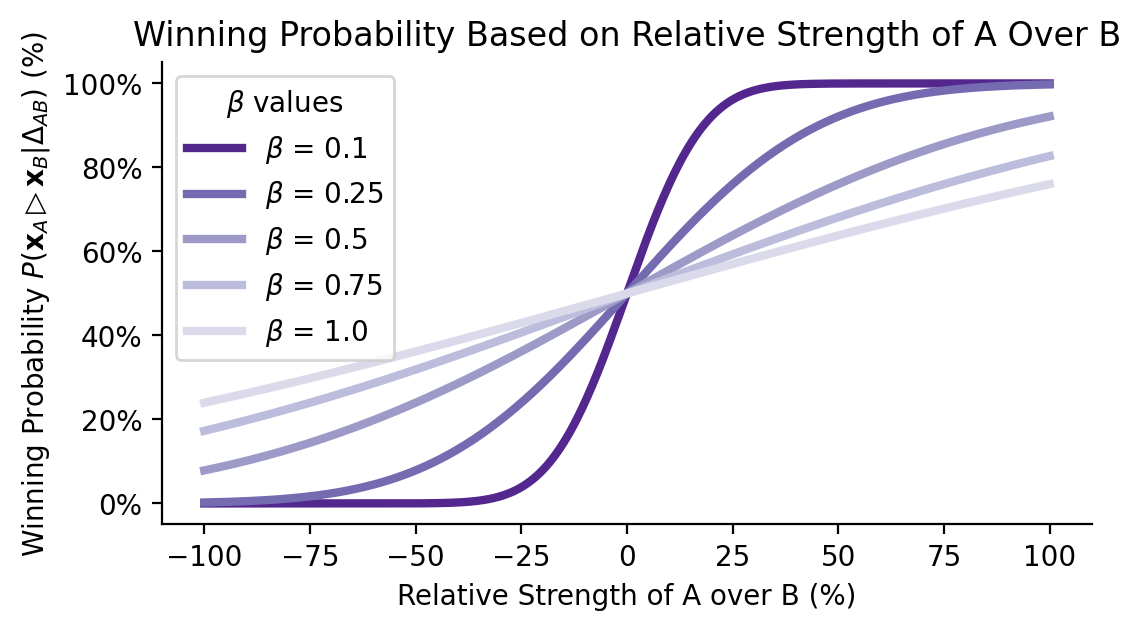

In [18]:
# Define range for Δ_AB from -50% to +50%
delta_ab_range = np.linspace(-1, 1, 500)
beta_values = [0.10, 0.25, 0.5, 0.75, 1.0]  # Using smaller betas to create steeper curves

# Plot f(Δ_AB) for different beta values
plt.figure(figsize=(6, 3), dpi=200)

for i, beta in enumerate(beta_values):
    plt.plot(delta_ab_range * 100, f(delta_ab_range, beta) * 100, label=rf'$\beta$ = {beta}', lw=3, color=colors[5- i])  # Convert to percentage scale

plt.grid(True, axis='y', which='major')
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', direction='out', top=False)    # Removes top ticks
ax.tick_params(axis='y', which='both', direction='out', right=False)  # Removes right ticks

# Set y-axis formatter to percentage
ax.yaxis.set_major_formatter(PercentFormatter())

plt.legend(title=r"$\beta$ values")
plt.xlabel("Relative Strength of A over B (%)")
plt.ylabel(r"Winning Probability $P\left(\mathbf{x}_A \triangleright \mathbf{x}_B | \Delta_{AB} \right)$ (%)")
plt.title("Winning Probability Based on Relative Strength of A Over B")
plt.show()

After match Alice vs Bob, outcome: win
Alice: μ = 29.21, σ = 8.33
Bob: μ = 20.79, σ = 8.33

After match Alice vs Charlie, outcome: loss
Alice: μ = 23.87, σ = 8.33
Charlie: μ = 30.33, σ = 8.33

After match Bob vs Charlie, outcome: win
Bob: μ = 27.69, σ = 8.33
Charlie: μ = 23.43, σ = 8.33

After match Alice vs Bob, outcome: loss
Alice: μ = 20.59, σ = 8.33
Bob: μ = 30.98, σ = 8.33

After match Charlie vs Alice, outcome: loss
Charlie: μ = 18.48, σ = 8.33
Alice: μ = 25.55, σ = 8.33

After match Bob vs Charlie, outcome: loss
Bob: μ = 23.15, σ = 8.33
Charlie: μ = 26.30, σ = 8.33



IndexError: list index out of range

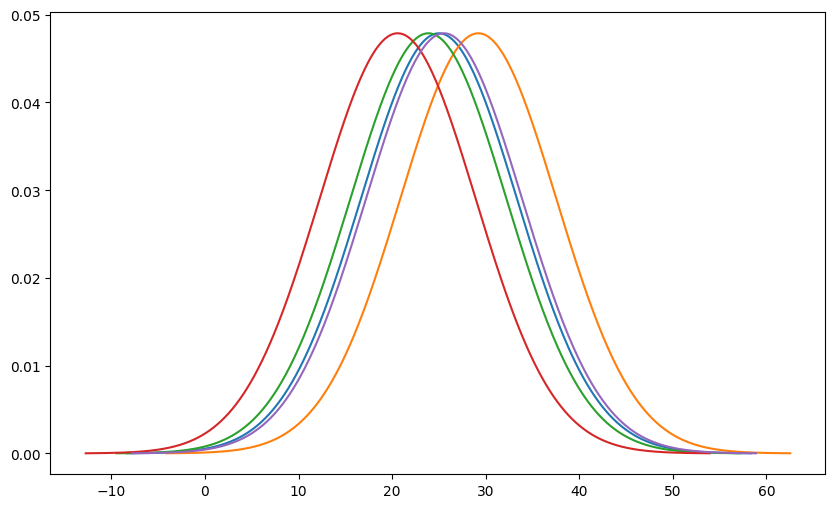

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Constants
BETA = 25 / 6  # Scaling parameter (adjust as needed)

class Player:
    def __init__(self, name, mu=25.0, sigma=25.0/3):
        self.name = name
        self.mu = mu        # Mean skill
        self.sigma = sigma  # Skill uncertainty (standard deviation)
        self.mu_history = [mu]
        self.sigma_history = [sigma]

    def update_skill(self, delta_mu, delta_sigma=None):
        self.mu += delta_mu
        self.mu_history.append(self.mu)
        if delta_sigma is not None:
            self.sigma = delta_sigma
        self.sigma_history.append(self.sigma)

def update_skills(player_a, player_b, outcome, beta=BETA):
    """
    Update the skills of player A and player B based on a match outcome.

    Parameters:
    - player_a: Player object for player A
    - player_b: Player object for player B
    - outcome: 1 if player A wins, 0 if player A loses
    - beta: Scaling parameter
    """
    # Compute the match variance
    sigma_z_squared = player_a.sigma ** 2 + player_b.sigma ** 2 + 2 * beta ** 2
    sigma_z = math.sqrt(sigma_z_squared)

    # Compute gamma
    gamma = (player_a.mu - player_b.mu) / sigma_z

    # Compute PDF and CDF of gamma
    pdf_gamma = norm.pdf(gamma)
    cdf_gamma = norm.cdf(gamma)

    if outcome == 1:
        # Player A wins
        delta_mu_a = (player_a.sigma ** 2 / sigma_z) * (pdf_gamma / cdf_gamma)
        delta_mu_b = - (player_b.sigma ** 2 / sigma_z) * (pdf_gamma / cdf_gamma)
    else:
        # Player A loses
        delta_mu_a = - (player_a.sigma ** 2 / sigma_z) * (pdf_gamma / (1 - cdf_gamma))
        delta_mu_b = (player_b.sigma ** 2 / sigma_z) * (pdf_gamma / (1 - cdf_gamma))

    # Update player A and B's mean skill
    player_a.update_skill(delta_mu_a)
    player_b.update_skill(delta_mu_b)

def plot_skill_evolution(player, time_steps):
    """
    Plot the evolution of a player's skill distribution over time.

    Parameters:
    - player: Player object
    - time_steps: List of time steps corresponding to matches
    """
    plt.figure(figsize=(10, 6))

    for i in range(len(time_steps)):
        mu = player.mu_history[i]
        sigma = player.sigma_history[i]
        x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 500)
        y = norm.pdf(x, mu, sigma)
        plt.plot(x, y, label=f'Match {i}: μ={mu:.2f}, σ={sigma:.2f}')

    plt.title(f"Evolution of {player.name}'s Skill Distribution")
    plt.xlabel('Skill Level')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

# Initialize players
players = {}  # Use a regular dictionary

# Function to get or create a player
def get_player(name):
    if name not in players:
        players[name] = Player(name)
    return players[name]

# Example historical data: list of matches (player A, player B, outcome)
# outcome = 1 if player A wins, 0 if player A loses
match_history = [
    ('Alice', 'Bob', 1),
    ('Alice', 'Charlie', 0),
    ('Bob', 'Charlie', 1),
    ('Alice', 'Bob', 0),
    ('Charlie', 'Alice', 0),
    ('Bob', 'Charlie', 0),
    # Add more match data as needed
]

time_steps = []
for idx, match in enumerate(match_history):
    player_a_name, player_b_name, outcome = match
    player_a = get_player(player_a_name)
    player_b = get_player(player_b_name)

    # Update skills based on the match outcome
    update_skills(player_a, player_b, outcome)

    # Record time steps
    time_steps.append(idx)

    # Print updated skills
    print(f"After match {player_a_name} vs {player_b_name}, outcome: {'win' if outcome == 1 else 'loss'}")
    print(f"{player_a_name}: μ = {player_a.mu:.2f}, σ = {player_a.sigma:.2f}")
    print(f"{player_b_name}: μ = {player_b.mu:.2f}, σ = {player_b.sigma:.2f}")
    print("")

# Plot the evolution of Alice's skill distribution
plot_skill_evolution(players['Alice'], time_steps)

